### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [0]:
import tensorflow as tf
from matplotlib import pyplot

#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#### Change train and test labels into one-hot vectors

In [0]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

#### Build the Graph

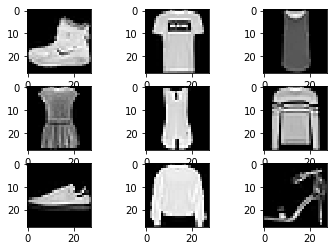

In [57]:
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

#### Initialize model, reshape & normalize data

In [0]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape


In [0]:
import keras
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10 

In [0]:
#initialize model
model = Sequential()

In [61]:
x_train[0].shape

(28, 28)

In [62]:
#Reshape data
x_train = x_train.reshape(x_train.shape[0], 28, 28 ,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28 , 1).astype('float32')
print("Train samples are :",x_test.shape , y_test.shape)

Train samples are : (10000, 28, 28, 1) (10000, 10)


In [0]:
#Normalize data
#Normalize both the train and test image data from 0-255 to 0-1
x_train = x_train/255
y_train = y_train/255

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [64]:
# 1st Conv Layer
 model.add(Convolution2D(32, 3, 3, input_shape=(28, 28,1)))
 model.add(Activation('relu'))
 #Adding dropout layer
 model.add(Dropout(0.25))
 #1st Fully Connected Layer
 model.add(Flatten())
 model.add(Dense(200))
 model.add(Activation('relu'))
 #2nd fully connected layer
 #model.add(Flatten())
 model.add(Dense(100))
 model.add(Activation('relu'))
 # Prediction Layer
 model.add(Activation('relu'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """Entry point for launching an IPython kernel.


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [67]:
 model.add(Dense(10))
 model.add(Activation('softmax'))
 # Loss and Optimizer
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Store Training Results
  early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
  callback_list = [early_stopping]
  model.fit(x_train, y_train, nb_epoch=EPOCHS, batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.





Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 164s 3ms/step - loss: 0.0015 - acc: 0.8562 - val_loss: 2.0489 - val_acc: 0.8695
Epoch 2/10
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0010 - acc: 0.9038 - val_loss: 2.1531 - val_acc: 0.8635
Epoch 3/10
60000/60000 [==============================] - 163s 3ms/step - loss: 8.1176e-04 - acc: 0.9219 - val_loss: 1.9335 - val_acc: 0.8774
Epoch 4/10
60000/60000 [==============================] - 163s 3ms/step - loss: 6.7304e-04 - acc: 0.9352 - val_loss: 1.8899 - val_acc: 0.8813
Epoch 5/10
51104/60000 [========================>.....] - ETA: 23s - loss: 5.4099e-04 - acc: 0.9479